Задача Б по алгоритмам и структурам данных из четвртого модуля:
# “Преобразование Фурье”

Задание:
1. Установите Jupyter и Python.
2. Для функции f на диапазоне [0, 10] с частотой дискретизации 100 изготовьте код для построения графика f. Используйте matplotlib.
3. Реализуйте прямое и обратное дискретное преобразование Фурье FFT и FFTReverse на питоне за $O(n \cdot log(n))$.
4. Подготовьте дискретизацию $f$ на отрезке [0, T] - набор значений $f_i=f(x_i)$ в точках $x_i$, равномерно расположенных на отрезке [0, T].
5. По функции $f=(f_0,..,f_{m-1})$ вычислите $g$ = FFT($f$).
6. Вычислите $f_2$ = FFTReverse($g$).
7. Постройте график $f_2$.
8. Обнулите некоторую долю D последних коэффициентов $g$. Обновите $f_2$ и ее график. Попробуйте несколько различных значений D.
9. Проведите эксперименты с функциями $f = x, x^2, sin(x), sin(x^2), sin(x) / x$. Для каждой функции найдите долю D, для которой разница f и f2 видна невооруженным глазом.

### 1 пункт:

In [157]:
import math  
import matplotlib.pyplot as plt

%matplotlib inline

### 2 пункт:
Для функции $f = sin(x)$ на диапазоне [0, 10] с частотой дискретизации 100 изготовим код для построения графика $f$.

In [290]:
#Строит график по (x, y) значениям
def function_plot(x_values, input_values):
    y_values = [i.real for i in input_values]
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(x_values, y_values, color = 'red')
    ax.set_xlim(borders[0], borders[1])
    height = (max(y_values) - min(y_values)) * 0.5
    ax.set_ylim(min(y_values) - height, max(y_values) + height)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.grid(True)
    plt.show()

In [291]:
#Возвращает равномерно расположенные точки x между границами
def partition(frequency, borders):
    return [borders[0] + i * (borders[1] - borders[0])/frequency for i in range(frequency)]

#Возвращает дискретизацию функуии на заданном наборе точек
def function_values(function, x_values):
    return [function(i) for i in x_values]

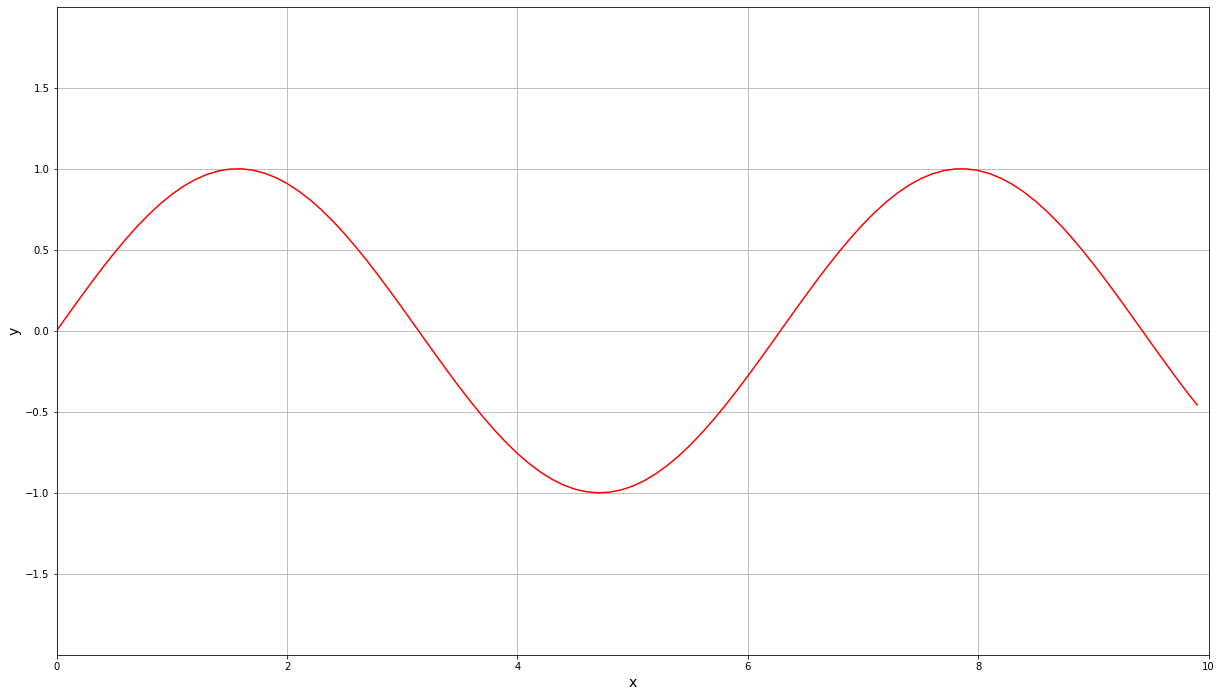

In [292]:
frequency = 100
borders = [0, 10]
x_values = partition(frequency, borders)
#Протестируем функции на синусе
y_values = function_values(math.sin, x_values)
function_plot(x_values, y_values)

### 3 пункт:
Реализуем прямое и обратное дискретное преобразование Фурье FFT и FFTReverse на питоне за $O(n \cdot log(n))$.

In [293]:
def internal_fft(arr, value):
    if (len(arr) > 1):
        num = int(len(arr)/2)
        first_half_arr = [arr[i*2] for i in range(0, num)]
        second_half_arr = [arr[i*2 + 1] for i in range(0, num)]
        first_answer = internal_fft(first_half_arr, value ** 2)
        second_answer = internal_fft(second_half_arr, value ** 2)
        final_arr = [0 for i in range(0, num*2)]
        for i in range(0, num):
            final_arr[i] = first_answer[i] + (value ** i) * second_answer[i]
            final_arr[i + num] = first_answer[i] - (value ** i) * second_answer[i]

        return final_arr
    else:
        return arr

In [312]:
#Длина массива должна быть степенью двойки
def fft(arr):
    alpha = 2*math.pi/len(arr)
    return internal_fft(arr, complex(math.cos(alpha), math.sin(alpha)));

#Длина массива должна быть степенью двойки
def fft_reverse(arr):
    alpha = -2*math.pi/len(arr)
    answer = internal_fft(arr, complex(math.cos(alpha), math.sin(alpha)));
    return [answer[i]/len(arr) for i in range(0, len(arr))]

### 4 пункт:
Подготовим дискретизацию $f$ на отрезке [0, T] - набор значений $f_i=f(x_i)$ в точках $x_i$, равномерно расположенных на отрезке [0, T].

In [313]:
x_values = partition(128, [0, 10])
f_values = function_values(math.sin, x_values)

### 5 пункт
По функции $f=(f_0,..,f_{m-1})$ вычислим $g$ = FFT($f$).

In [314]:
g_values = fft(f_values)

### 6 пункт
Вычислим $f_2$ = FFTReverse($g$).

In [315]:
f_2_values = fft_reverse(g_values)

### 7 пункт
Построем график $f_2$.

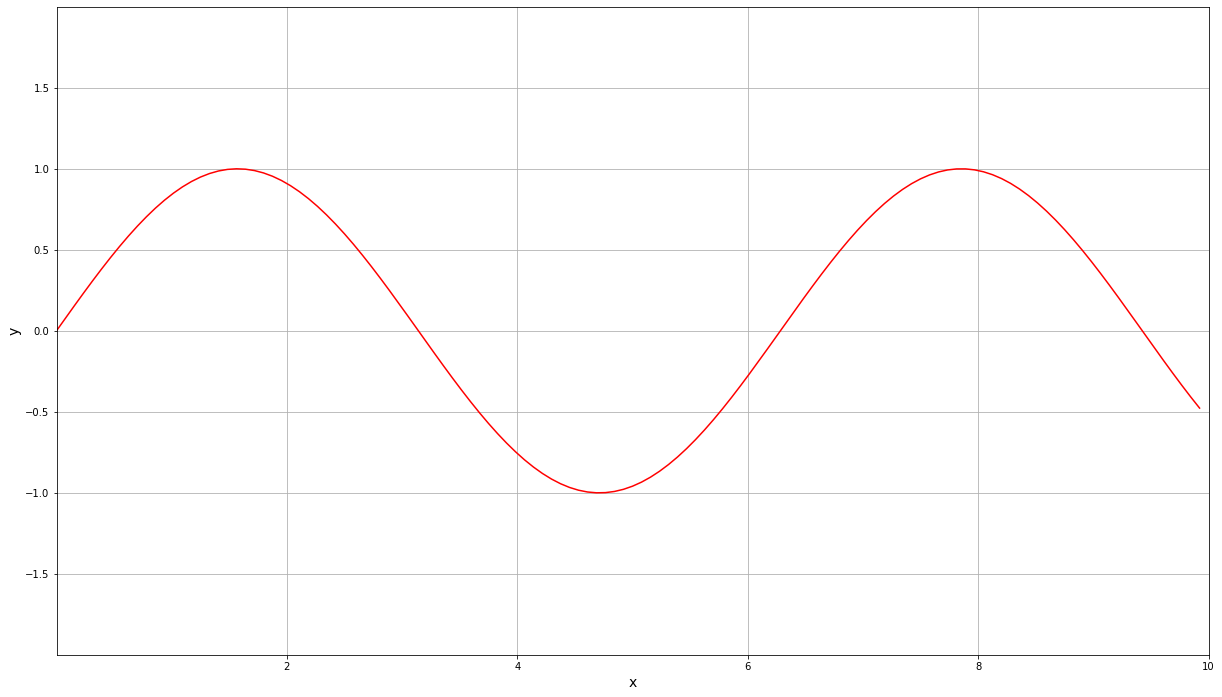

In [316]:
function_plot(x_values, f_2_values)

Заметим, что график совпадает с первоначальным, следовательно, разложение Фурье работает корректно. 

### 8 пункт
Обнулим некоторую долю D последних коэффициентов $g$. Обновим $f_2$ и ее график. Попробуем несколько различных значений D.

#### Возьмём только первые 127 элементов:

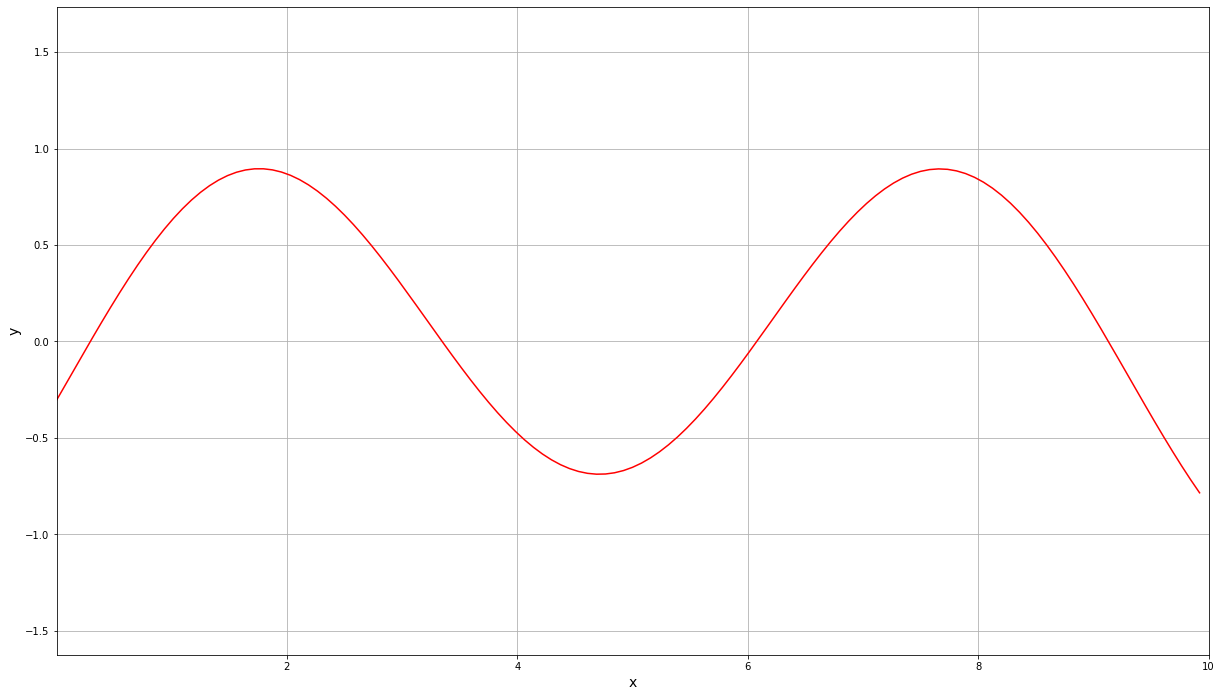

In [317]:
g_1 = [g_values[i] if i < 127 else 0 for i in range(0, len(g_values))]
f_1 = fft_reverse(g_1)
function_plot(x_values, f_1)

Заметим, что график слабо исказился

#### Возьмём только первые 32 элемента:

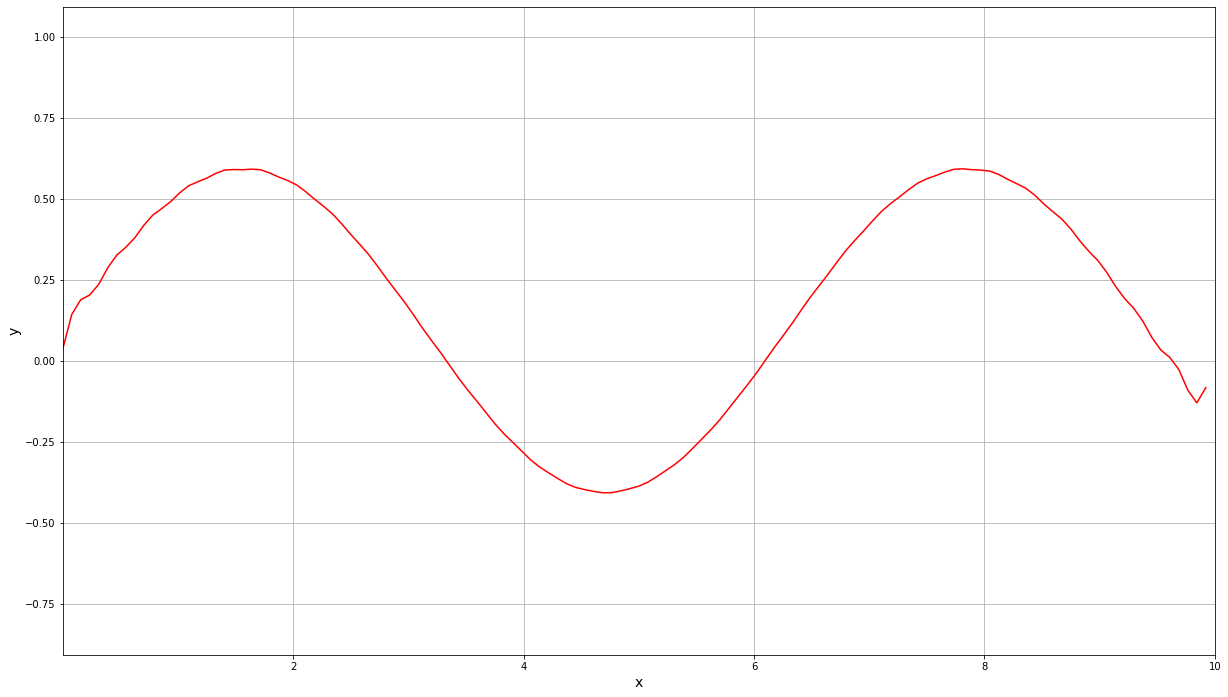

In [318]:
g_2 = [g_values[i] if i < 32 else 0 for i in range(0, len(g_values))]
f_2 = fft_reverse(g_2)
function_plot(x_values, f_2)

График исказился сильнее, на нём появились "волны"

### 9 пункт
Проведём эксперименты с функциями $f = x, x^2, sin(x), sin(x^2), \frac{sin(x)}{x}$. Для каждой функции найдём долю D, для которой разница $f$ и $f_2$ видна невооруженным глазом.

In [319]:
#Строит 2 графика по (x, y) значениям
def comparison_plot(x_values, y_values, rev_fft_values):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.plot(x_values, y_values, color = 'blue',
                             label = 'Original')
    ax.scatter(x_values, rev_fft_values, color = 'red',
                             label = 'Processed by FFT')
    ax.legend(loc='best',
              fontsize=14)
    ax.set_xlim(borders[0], borders[1])
    height = (max(y_values) - min(y_values)) * 0.5
    ax.set_ylim(min(y_values) - height, max(y_values) + height)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.grid(True)
    plt.show()

In [320]:
#accuracy - количество не обнуляемых коэффициентов
def compare(frequency, borders, accuracy, function):
    set_x = partition(frequency, borders)
    values = function_values(function, set_x)
    set_g = fft(values)
    spoiled_set_g = [set_g[i] if i < accuracy else 0 for i in range(0, len(set_g))]
    spoiled_values = fft_reverse(spoiled_set_g)
    comparison_plot(set_x, values, spoiled_values)

Возьмём в этот раз несколько больше точек, а именно 32768

In [321]:
frequency = 32768
borders = [0.001, 10]

##### Функия y = x:

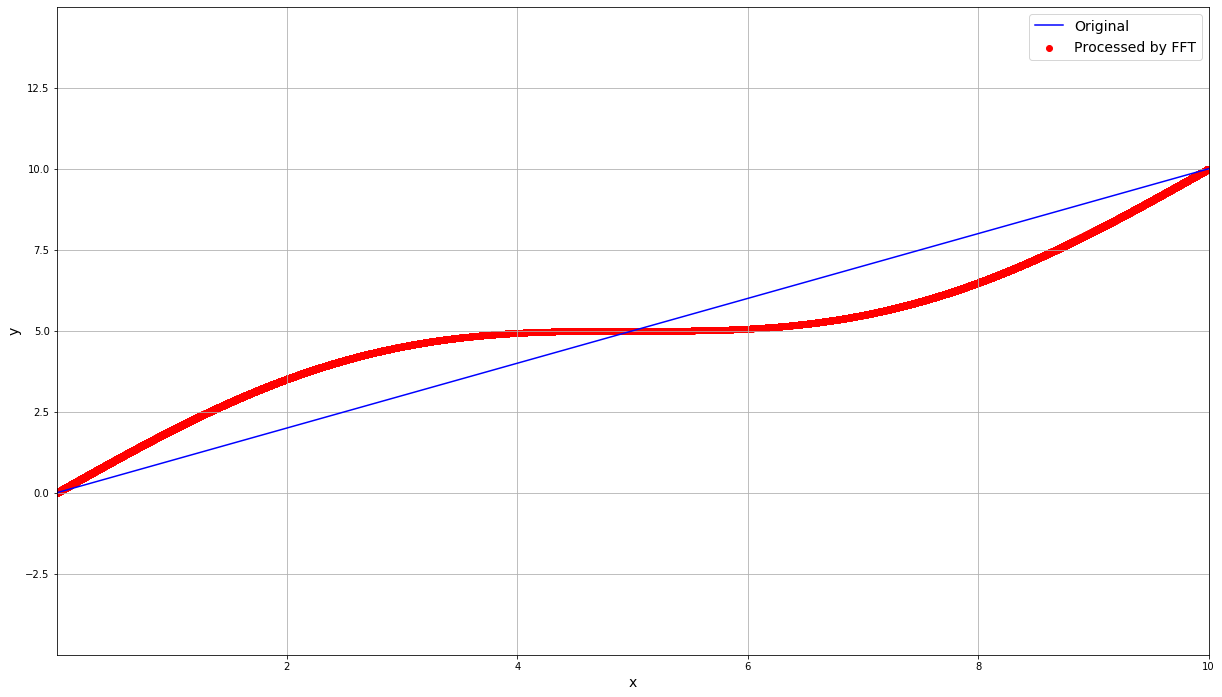

In [322]:
compare(frequency, borders, 32767, lambda x: x)

##### Функция y = x^2:

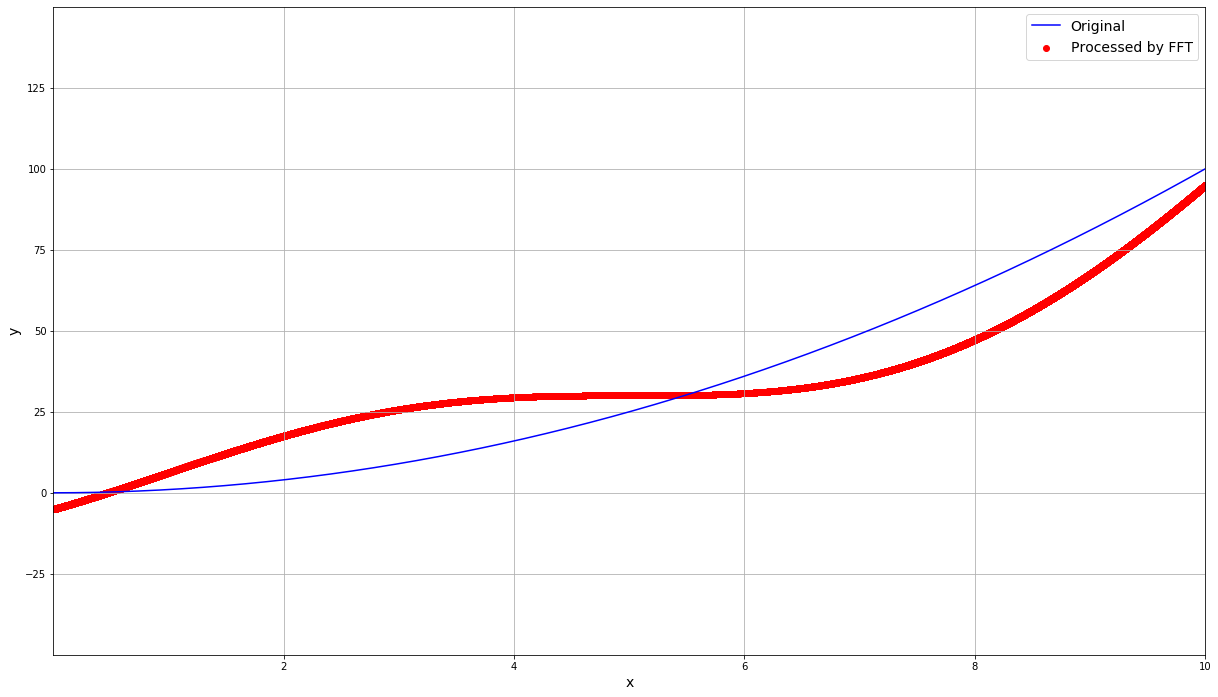

In [323]:
compare(frequency, borders, 32767, lambda x: x**2)

##### Функция sin(x):

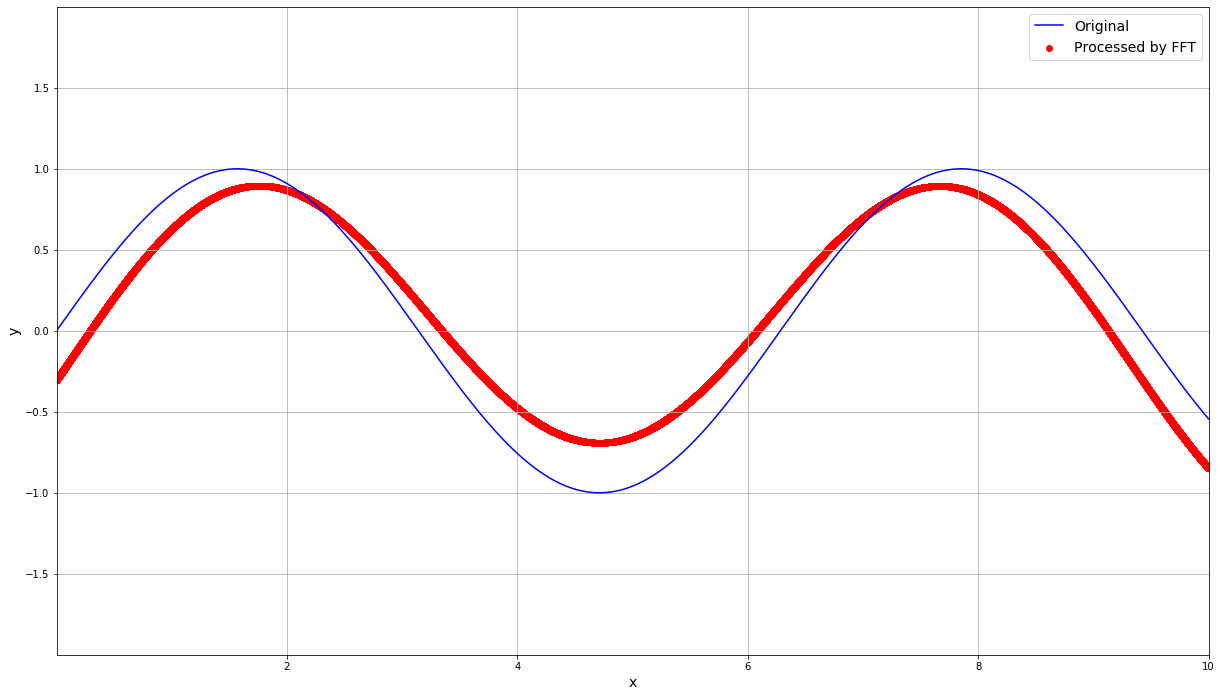

In [324]:
compare(frequency, borders, 32767, math.sin)

##### Функция sin(x^2):

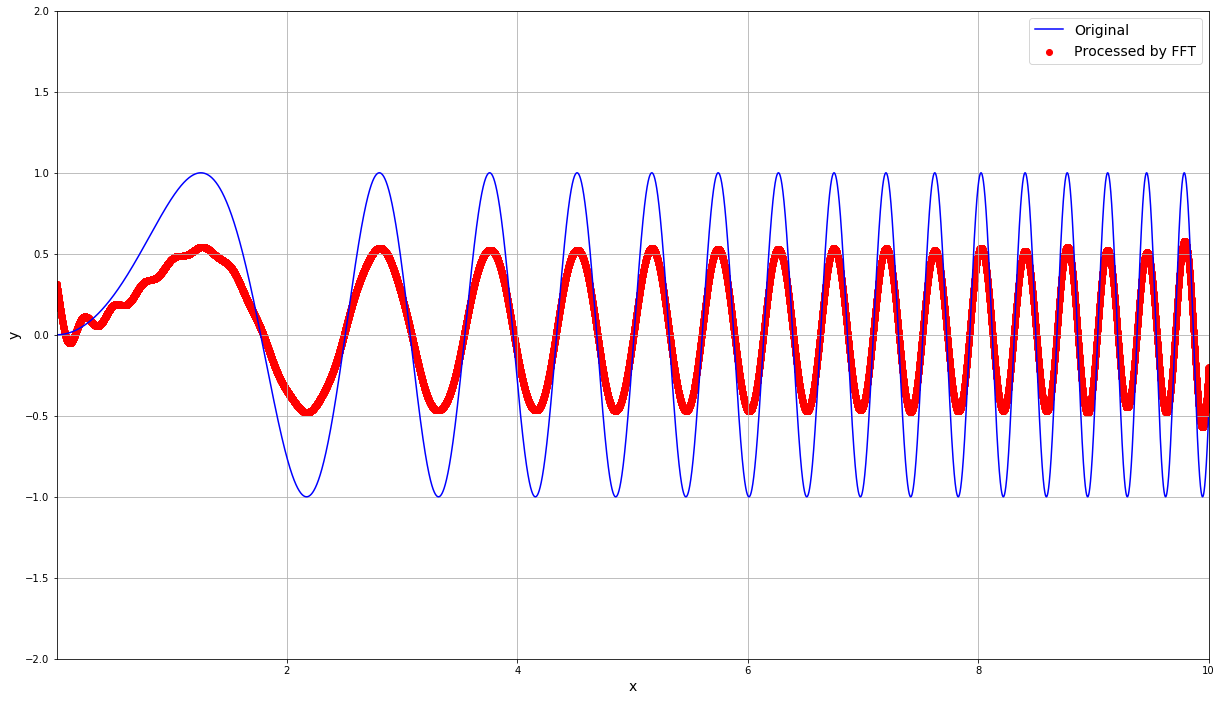

In [338]:
compare(frequency, borders, 32730, lambda x: math.sin(x**2))

##### Функция sin(x)/x:

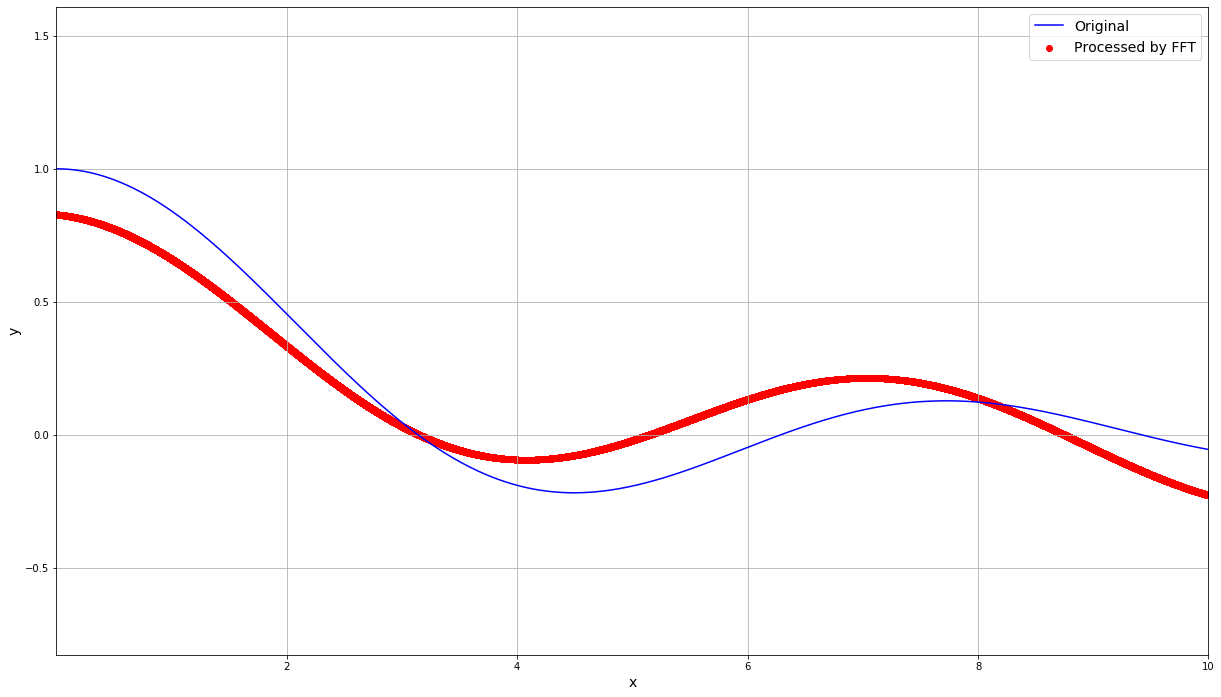

In [326]:
compare(frequency, borders, 32767, lambda x: math.sin(x)/x)

Повторно убедимся, что без зануления коэффициентов преобразование Фурье работает корректно:

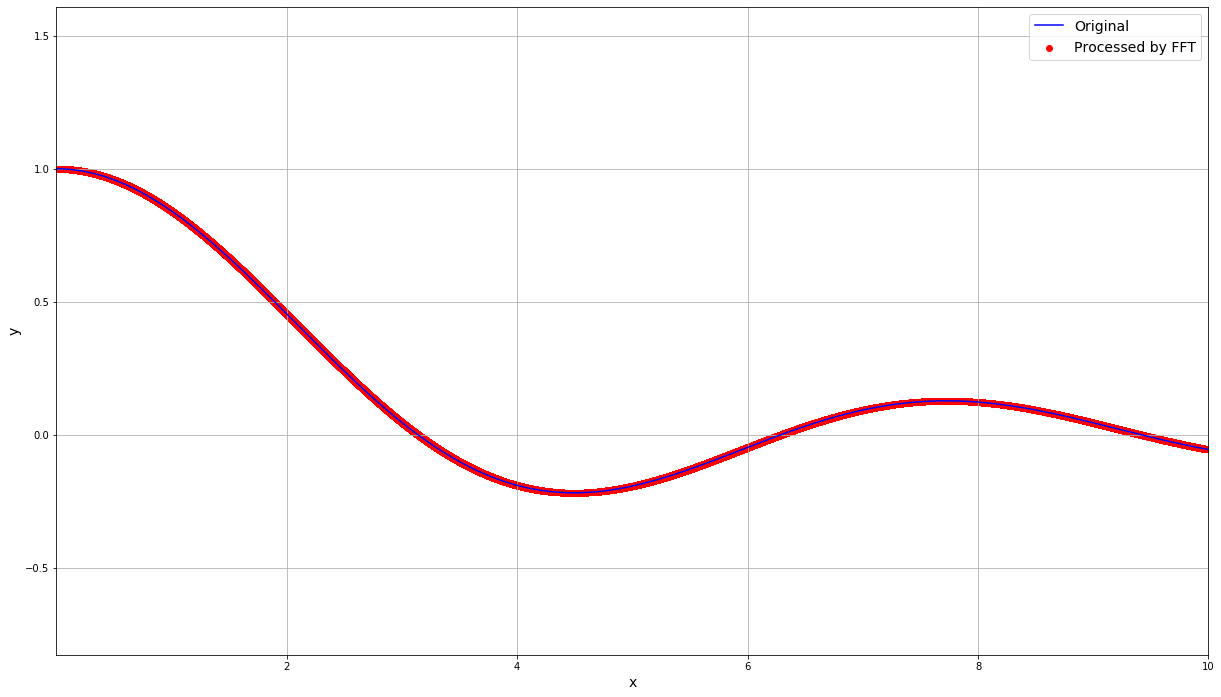

In [327]:
compare(frequency, borders, 32768, lambda x: math.sin(x)/x)